<a href="https://colab.research.google.com/github/Dhrubo04/WeWalk/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

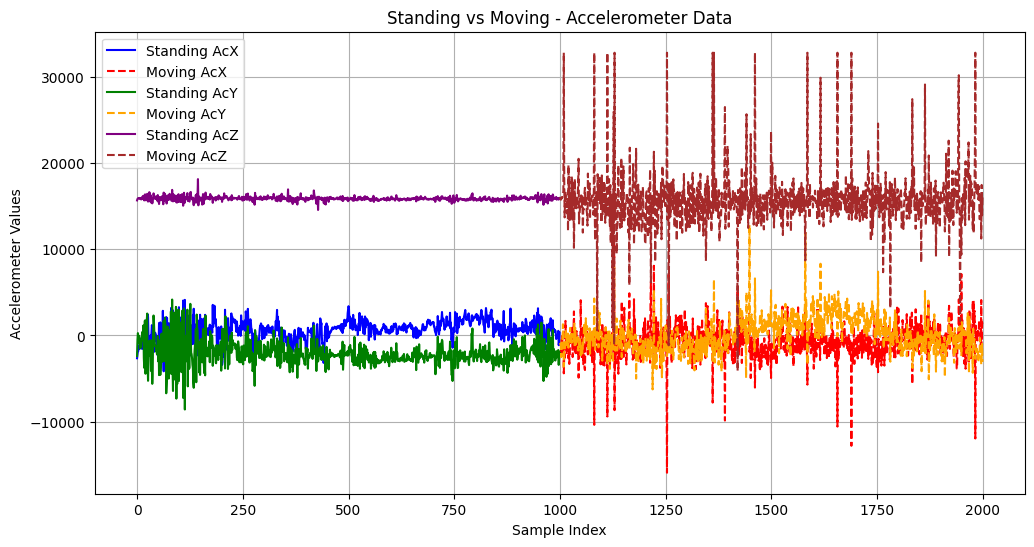

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV Data (Fixed Path Issue)
filename = r"/MPU6050_data.csv"  # Raw string method
df = pd.read_csv(filename)

# Separate Standing and Moving Data
standing_data = df[df["Activity"] == "standing"]
moving_data = df[df["Activity"] == "moving"]

# Plot Accelerometer Data (AcX, AcY, AcZ)
plt.figure(figsize=(12, 6))

# Plot AcX
plt.plot(standing_data.index, standing_data["AcX"], label="Standing AcX", color="blue")
plt.plot(moving_data.index, moving_data["AcX"], label="Moving AcX", color="red", linestyle="dashed")

# Plot AcY
plt.plot(standing_data.index, standing_data["AcY"], label="Standing AcY", color="green")
plt.plot(moving_data.index, moving_data["AcY"], label="Moving AcY", color="orange", linestyle="dashed")

# Plot AcZ
plt.plot(standing_data.index, standing_data["AcZ"], label="Standing AcZ", color="purple")
plt.plot(moving_data.index, moving_data["AcZ"], label="Moving AcZ", color="brown", linestyle="dashed")

# Labels and Title
plt.xlabel("Sample Index")
plt.ylabel("Accelerometer Values")
plt.title("Standing vs Moving - Accelerometer Data")
plt.legend()
plt.grid()

# Show Plot
plt.show()


<ipython-input-4-acb4efb53c69>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Activity", y="AcX", data=df, palette="coolwarm")


Text(0.5, 1.0, 'Scatter Plot: AcX vs AcY')

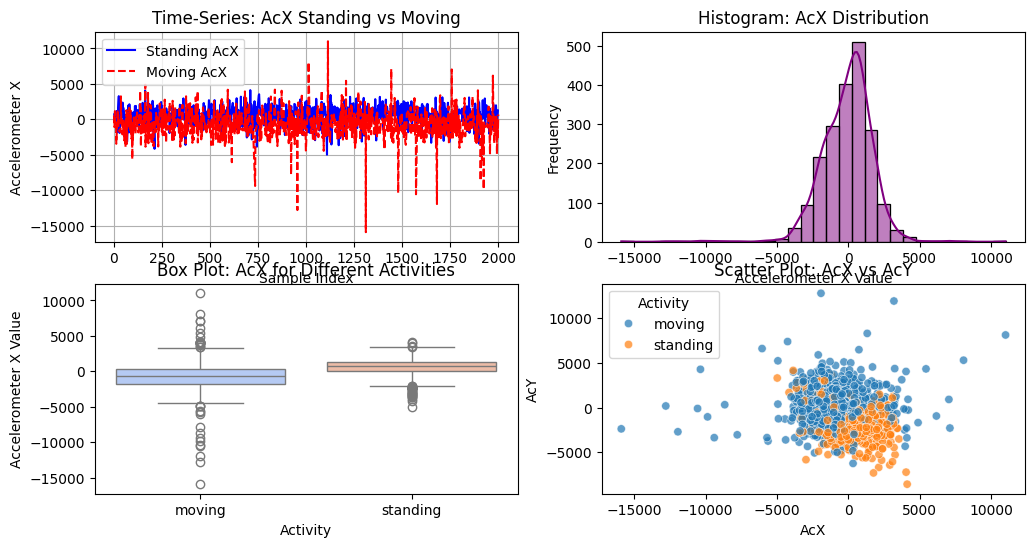

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV Data
filename = r"/MPU6050_data_shuffled.csv"
df = pd.read_csv(filename)

# Convert Activity column to lowercase for consistency
df["Activity"] = df["Activity"].str.strip().str.lower()

# Separate data for each activity
standing_data = df[df["Activity"] == "standing"]
moving_data = df[df["Activity"] == "moving"]

# Set figure size
plt.figure(figsize=(12, 6))

# ---- 1️⃣ TIME-SERIES LINE PLOT ----
plt.subplot(2, 2, 1)
plt.plot(standing_data.index, standing_data["AcX"], label="Standing AcX", color="blue")
plt.plot(moving_data.index, moving_data["AcX"], label="Moving AcX", color="red", linestyle="dashed")
plt.xlabel("Sample Index")
plt.ylabel("Accelerometer X")
plt.title("Time-Series: AcX Standing vs Moving")
plt.legend()
plt.grid()

# ---- 2️⃣ HISTOGRAM ----
plt.subplot(2, 2, 2)
sns.histplot(df["AcX"], kde=True, bins=30, color="purple")
plt.xlabel("Accelerometer X Value")
plt.ylabel("Frequency")
plt.title("Histogram: AcX Distribution")

# ---- 3️⃣ BOX PLOT ----
plt.subplot(2, 2, 3)
sns.boxplot(x="Activity", y="AcX", data=df, palette="coolwarm")
plt.xlabel("Activity")
plt.ylabel("Accelerometer X Value")
plt.title("Box Plot: AcX for Different Activities")

# ---- 4️⃣ SCATTER PLOT ----
plt.subplot(2, 2, 4)
sns.scatterplot(x="AcX", y="AcY", hue="Activity", data=df, alpha=0.7)
plt.xlabel("AcX")
plt.ylabel("AcY")
plt.title("Scatter Plot: AcX vs AcY")


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the randomized dataset
filename = r"C:\Users\Arya\OneDrive\Desktop\project\MPU6050_data_shuffled.csv"
df = pd.read_csv(filename)

# Separate features (X) and labels (y)
X = df[['AcX', 'AcY', 'AcZ', 'GyX', 'GyY', 'GyZ']].values  # Feature columns
y = df['Activity'].map({'standing': 0, 'moving': 1}).values  # Convert labels to numbers

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize (Standardize) the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(6,)),  # Input Layer (6 features)
    keras.layers.Dense(8, activation='relu'),                     # Hidden Layer
    keras.layers.Dense(1, activation='sigmoid')                   # Output Layer (Binary Classification)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")

# Save Model for Deployment
model.save(r"C:\Users\Arya\OneDrive\Desktop\project\mpu6050_model.h5")
print("✅ Model saved successfully.")


In [6]:
# Install dependencies
!pip install tensorflow pandas numpy scikit-learn

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# ✅ Step 1: Load the dataset
filename = "/MPU6050_data_shuffled.csv"  # Make sure to upload the file first
df = pd.read_csv(filename)

# ✅ Step 2: Preprocess the Data
# Map activity labels to numbers (e.g., standing=0, moving=1)
df["Activity"] = df["Activity"].map({"standing": 0, "moving": 1})

# Separate features (X) and target labels (y)
X = df[["AcX", "AcY", "AcZ", "GyX", "GyY", "GyZ"]].values
y = df["Activity"].values

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 3: Build the Model
model = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(6,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # Binary classification
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# ✅ Step 4: Save and Convert to TensorFlow Lite
model.save("mpu6050_activity_model.h5")  # Save model in HDF5 format

# Convert model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite model
with open("mpu6050_activity_model.tflite", "wb") as f:
    f.write(tflite_model)

# ✅ Step 5: Download the Model for Deployment
from google.colab import files
files.download("mpu6050_activity_model.h5")  # HDF5 model
files.download("mpu6050_activity_model.tflite")  # TFLite model

print("✅ Model saved and ready for ESP8266 deployment!")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6914 - loss: 0.6559 - val_accuracy: 0.8375 - val_loss: 0.5279
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8556 - loss: 0.4867 - val_accuracy: 0.8625 - val_loss: 0.4092
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8604 - loss: 0.3812 - val_accuracy: 0.8650 - val_loss: 0.3610
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8547 - loss: 0.3535 - val_accuracy: 0.8650 - val_loss: 0.3360
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8827 - loss: 0.2999 - val_accuracy: 0.8700 - val_loss: 0.3163
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8842 - loss: 0.2758 - val_accuracy: 0.8725 - val_loss: 0.3007
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8969 - loss: 0.2633 - val_accuracy: 0.8725 - val_loss: 0.2835
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8981 - loss: 0.2390 - val_accuracy: 0.8800 - val_loss: 0.2698
Epo

Saved artifact at '/tmp/tmp08adnfh8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134778999786192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134778999793488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134778999793296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134778999787536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134778999787728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134778999788112: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Model saved and ready for ESP8266 deployment!


In [7]:
import tensorflow as tf
import numpy as np

# Load model
model = tf.keras.models.load_model("/mpu6050_activity_model.h5")

# Extract weights
for layer in model.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}, Weights: {weights}")
    np.save(f"{layer.name}.npy", weights)

Layer: dense_4, Weights: [array([[-0.31964856, -0.2258484 ,  0.36552653,  0.1502659 ,  0.34570628,
         0.09196091, -0.33235413,  0.4595232 ,  0.2504564 ,  0.05905094,
        -0.13574927, -0.23839588, -0.17008969,  0.01971824,  0.6052223 ,
         0.40375498, -0.091254  ,  0.20850402, -0.30478123,  0.2892447 ,
        -0.01776549, -0.36379918,  0.10072841, -0.06304596, -0.2242868 ,
        -0.20050776,  0.16503718,  0.21689865, -0.24081229,  0.15701477,
        -0.22548519, -0.04128619],
       [-0.1176823 ,  0.16242555, -0.24928375,  0.05740827,  0.22341116,
         0.1528431 , -0.22606434,  0.07970091,  0.21167012,  0.19250618,
        -0.5129304 ,  0.01741214,  0.18282029,  0.20382273, -0.49784315,
        -0.06870062, -0.02085579, -0.2906089 ,  0.22303848, -0.30220407,
        -0.222933  ,  0.2794982 ,  0.13169686, -0.20469807,  0.10555822,
        -0.04683079,  0.27358937,  0.22539651, -0.2429672 , -0.07873492,
        -0.23464052, -0.02022824],
       [ 0.21876962,  0.1817

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-8-59376e9f94fa>, line 11)

In [9]:
import tensorflow as tf
import numpy as np
import os

# Mount Google Drive (if you want to save there)
from google.colab import drive
drive.mount('/content/drive')

# Define paths
MODEL_PATH = "/mpu6050_activity_model.h5"  # Update this if needed
SAVE_PATH = "/content/drive/My Drive/ML_Weights/"  # Change if you want local storage

# Ensure save directory exists
os.makedirs(SAVE_PATH, exist_ok=True)

# Load model
model = tf.keras.models.load_model(MODEL_PATH)

# Extract and save weights
for layer in model.layers:
    weights = layer.get_weights()
    if weights:  # Save only if layer has weights
        np.save(os.path.join(SAVE_PATH, f"{layer.name}.npy"), weights)
        print(f"✅ Weights saved for layer: {layer.name}")

print(f"\n🎯 All weights saved in: {SAVE_PATH}")


MessageError: Error: credential propagation was unsuccessful